In [8]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

from prepare import prep_driver_data, prep_vehicle_data, prep_damage_data

In [9]:
#bring in .csv
df = pd.read_csv('all_accident_data-Copy1.csv', index_col=None)

In [3]:
#drop unnecessary columns
df = df.drop(columns=['index', 'Unnamed: 0'])

In [4]:
df

,crash_url,case_id,crash_id,crash_city,crash_date,crash_latitude,crash_longitude,police_dept,accident_factor,speed_limit,...,driver_age,driver_gender,driver_ethnicity,driver_residence,driver_car_damage,driver_license_type,driver_license_state,driver_insured,traffic_conditions,weather_conditions
0,https://app.myaccident.org/accident/0000281836...,SAPD21133935,18365140,"SAN ANTONIO, TX",07/12/21 07:00 PM,29.416846,-98.409521,SAN ANTONIO POLICE DEPARTMENT,The driver of 2006 NEW FLYER TURNED WHEN UNSAFE,30 MPH,...,63.0,Male,Black,NaN,LBQ - LEFT BACK QUARTER DAMAGE ANGULAR IMPACT,"Commercial driver lic., class b",Texas,Yes,STOP SIGN,CLEAR
1,https://app.myaccident.org/accident/0000281836...,SAPD21133935,18365140,"SAN ANTONIO, TX",07/12/21 07:00 PM,29.416846,-98.409521,SAN ANTONIO POLICE DEPARTMENT,The driver of 2006 NEW FLYER TURNED WHEN UNSAFE,30 MPH,...,33.0,Female,Black,NaN,FL - FRONT END (LEFT) DAMAGE PARTIAL CONTACT,"Driver license, class c",Texas,Yes,STOP SIGN,CLEAR
2,https://app.myaccident.org/accident/0000281836...,SAPD21133954,18362861,"SAN ANTONIO, TX",07/12/21 06:55 PM,29.608839,-98.492803,SAN ANTONIO POLICE DEPARTMENT,NaN,45 MPH,...,NaN,Unknown,Unknown,NaN,UNKNOWN,"Unknown, unknown",NaN,Unknown,MARKED LANES,CLOUDY
3,https://app.myaccident.org/accident/0000281836...,SAPD21133954,18362861,"SAN ANTONIO, TX",07/12/21 06:55 PM,29.608839,-98.492803,SAN ANTONIO POLICE DEPARTMENT,NaN,45 MPH,...,54.0,Male,White,NaN,BD - BACK END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,MARKED LANES,CLOUDY
4,https://app.myaccident.org/accident/0000281837...,21-1037,18378488,"SHAVANO PARK, TX",07/12/21 06:45 PM,29.597752,-98.562687,SHAVANO PARK POLICE DEPARTMENT,The driver of 2011 JEEP DRIVER INATTENTION The...,45 MPH,...,29.0,Female,Hispanic,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Id card, unlicensed",Texas,Unknown,SIGNAL LIGHT,CLEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,https://app.myaccident.org/accident/0000281810...,SAPD21028089,18108730,"SAN ANTONIO, TX",02/12/21 06:15 PM,29.381912,-98.700943,SAN ANTONIO POLICE DEPARTMENT,The driver of 2011 NISSAN DISREGARD STOP SIGN ...,65 MPH,...,22.0,Male,Hispanic,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Id card, unlicensed",Texas,Yes,MARKED LANES,CLEAR
15116,https://app.myaccident.org/accident/0000281810...,SAPD21028089,18108730,"SAN ANTONIO, TX",02/12/21 06:15 PM,29.381912,-98.700943,SAN ANTONIO POLICE DEPARTMENT,The driver of 2011 NISSAN DISREGARD STOP SIGN ...,65 MPH,...,22.0,Male,Hispanic,NaN,RFQ - RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT,"Unlicensed, unlicensed",Texas,Yes,MARKED LANES,CLEAR
15117,https://app.myaccident.org/accident/0000281810...,SAPD21028089,18108730,"SAN ANTONIO, TX",02/12/21 06:15 PM,29.381912,-98.700943,SAN ANTONIO POLICE DEPARTMENT,The driver of 2011 NISSAN DISREGARD STOP SIGN ...,65 MPH,...,44.0,Male,Hispanic,NaN,RFQ - RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT,"Driver license, class c",Texas,Yes,MARKED LANES,CLEAR
15118,https://app.myaccident.org/accident/0000281810...,SAPD21028081,18106090,"SAN ANTONIO, TX",02/12/21 06:04 PM,29.445502,-98.540641,SAN ANTONIO POLICE DEPARTMENT,The driver of 2017 MITSUBISHI DRIVER INATTENTION,30 MPH,...,23.0,Male,Hispanic,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,STOP SIGN,CLOUDY


In [5]:
df.driver_car_damage.apply(lambda row: re.search(r'^(\S+){1,4}.+', row).group(1)).nunique()

24

In [6]:
df.car_vin.apply(lambda row: re.sub(r'(\w{4})X+(\d{4})', '\\1*********\\2', row))

0        5FYD*********0945
1        2HGF*********4336
2                  Unknown
3        3GCP*********9684
4        1J4P*********8270
               ...        
15115    3N1B*********8881
15116    1FMP*********2763
15117    5FNY*********0074
15118    JA32*********2616
15119    JM3E*********7919
Name: car_vin, Length: 15120, dtype: object

In [7]:
df.dtypes

crash_url                object
case_id                  object
crash_id                  int64
crash_city               object
crash_date               object
crash_latitude          float64
crash_longitude         float64
police_dept              object
accident_factor          object
speed_limit              object
crash_location           object
num_of_injuries           int64
num_of_vehicles           int64
num_of_occupants          int64
at_fault                  int64
car_contained_injury      int64
car_make                 object
car_year                 object
car_color                object
car_vin                  object
driver_age              float64
driver_gender            object
driver_ethnicity         object
driver_residence        float64
driver_car_damage        object
driver_license_type      object
driver_license_state     object
driver_insured           object
traffic_conditions       object
weather_conditions       object
dtype: object

In [8]:
#car year needs to be int
#crash_date needs to be datetime
#drop driver ethnicity
#drop crash city

In [9]:
df.car_make.isna().sum()

982

In [10]:
df.car_make = df.car_make.str.strip().str.lower()

In [11]:
df.car_year = pd.to_numeric(df.car_year, errors='coerce')

In [12]:
df.car_make = df.car_make.fillna('unknown')

In [27]:
len(df.car_make)

15120

In [28]:
len(df.car_year)

15120

In [15]:
df['car_year'] = df.groupby(['car_make']).car_year.transform(lambda x: x.fillna(x.mode()))

In [17]:
print('done')

done


In [18]:
#df.shape

In [19]:
#2166/15120

In [20]:
#df[df.car_year > 0].car_year.describe().transpose()

In [21]:
df[df.car_year >0].car_year.describe().transpose()

count    12756.000000
mean      2011.974757
std          6.510636
min       1901.000000
25%       2007.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: car_year, dtype: float64

In [22]:
#acura = 2008
#ford = 

In [23]:
# df.car_year = df.car_year.apply(lambda row: re.sub(r'\s?(\d{4})(.0)?', r'\1', str(row)))
# df.car_year = df.car_year.apply(lambda row: re.sub(r'\s*[A-Za-z]+\s*', '', str(row)))

In [31]:
df.car_year.

12756

In [25]:
df.car_make = df.car_make.str.strip().str.lower()

In [26]:
df.car_year.count()

12756

---

In [10]:
#from prepare import prep_driver_data, prep_vehicle_data, prep_damage_data
df = prep_driver_data(df)
df = prep_vehicle_data(df)
df = prep_damage_data(df)

In [17]:
df.columns

Index(['Unnamed: 0', 'index', 'crash_url', 'case_id', 'crash_id', 'crash_city',
       'crash_date', 'crash_latitude', 'crash_longitude', 'police_dept',
       'accident_factor', 'speed_limit', 'crash_location', 'num_of_injuries',
       'num_of_vehicles', 'num_of_occupants', 'at_fault',
       'car_contained_injury', 'vehicle_make', 'vehicle_year', 'vehicle_color',
       'vin', 'driver_age', 'driver_gender', 'driver_ethnicity',
       'driver_residence', 'dl_state', 'driver_insured', 'traffic_conditions',
       'weather_conditions', 'cdl', 'unlicensed', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'vehicle_dmg_zone', 'concentrated_damage',
       'distributed_damage', 'rollover_damage', 'vehicle_burned'],
      dtype='object')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

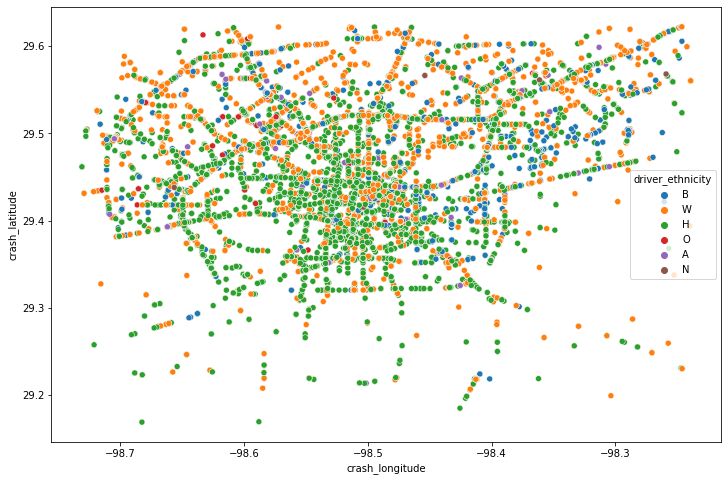

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="crash_longitude", y="crash_latitude", hue='driver_ethnicity')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

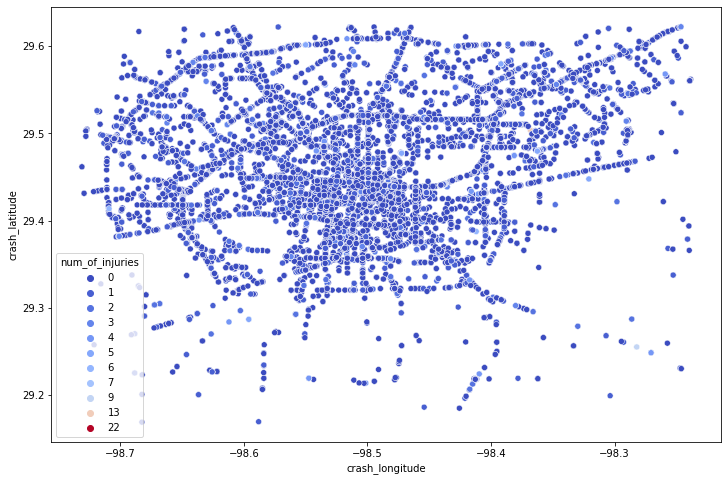

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="crash_longitude", y="crash_latitude", hue='num_of_injuries', palette = 'coolwarm', legend = 'full')

In [22]:
df.num_of_injuries.max()

22

In [27]:
df.loc[df.num_of_injuries==22]

,Unnamed: 0,index,crash_url,case_id,crash_id,crash_city,crash_date,crash_latitude,crash_longitude,police_dept,...,cdl,unlicensed,dl_class_a,dl_class_b,dl_class_m,vehicle_dmg_zone,concentrated_damage,distributed_damage,rollover_damage,vehicle_burned
3567,3567,3567,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,1,0,0,0,-1,0,0,0,0
3568,3568,3568,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,2,0,0,0,0
3569,3569,3569,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,2,0,0,0,0
3570,3570,3570,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,1,0,0,0,6,0,0,0,0
3571,3571,3571,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,6,0,0,0,0
3572,3572,3572,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,7,0,1,0,0
3573,3573,3573,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,4,0,1,0,0
3574,3574,3574,https://app.myaccident.org/accident/0000281833...,SAPD21122634,18332740,"SAN ANTONIO, TX",06/27/21 10:24 AM,29.39991,-98.472491,SAN ANTONIO POLICE DEPARTMENT,...,0,0,0,0,0,2,0,0,0,0


In [28]:
df.num_of_injuries.value_counts()

0     11069
1      2771
2       810
3       291
4        91
5        37
6        24
9         9
22        8
7         7
13        3
Name: num_of_injuries, dtype: int64

In [34]:
df.dtypes

Unnamed: 0                int64
index                     int64
crash_url                object
case_id                  object
crash_id                  int64
crash_city               object
crash_date               object
crash_latitude          float64
crash_longitude         float64
police_dept              object
accident_factor          object
speed_limit              object
crash_location           object
num_of_injuries           int64
num_of_vehicles           int64
num_of_occupants          int64
at_fault                  int64
car_contained_injury      int64
vehicle_make             object
vehicle_year              int64
vehicle_color            object
vin                      object
driver_age                int64
driver_gender            object
driver_ethnicity         object
driver_residence        float64
dl_state                 object
driver_insured           object
traffic_conditions       object
weather_conditions       object
cdl                       int64
unlicens

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

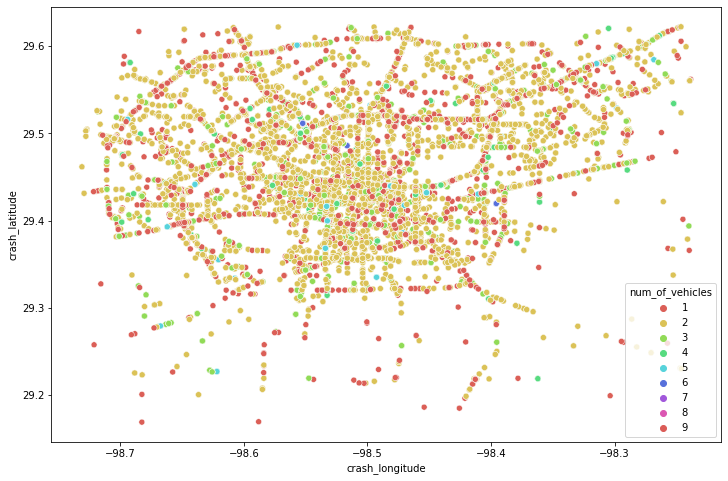

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="crash_longitude", y="crash_latitude", hue='num_of_vehicles', palette = 'hls', legend = 'full')

<AxesSubplot:xlabel='crash_longitude', ylabel='crash_latitude'>

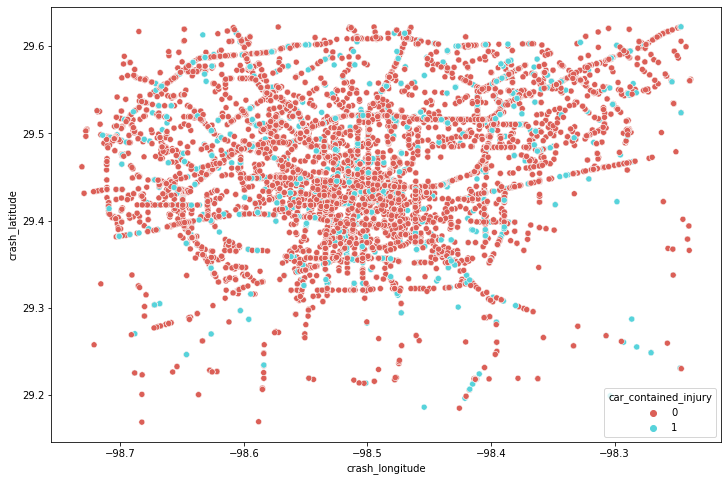

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="crash_longitude", y="crash_latitude", hue='car_contained_injury', palette = 'hls', legend = 'full')